# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

_______________________________________________________________________________________________________________________
In this exercise, I will examine how Americans like their steaks cooked. This data was aggregated by writers at FiveThirtyEight from a SurveyMonkey Adueience poll. I will use a few variables to highlight trends on how Americans likes their steak cooked. 

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
steak_df = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv')

Rows: 551 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): Consider the following hypothetical situations: <br>In Lottery A, ...
dbl  (1): RespondentID

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
steak_df |> colnames()

[1] "RespondentID"                                                                                                                                                                                                                                                                     
 [2] "Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?"
 [3] "Do you ever smoke cigarettes?"                                                                                                                                                                                                                                                    
 [4] "Do you ever drink alcohol?"                                                                                                                                                                                                                                                       
 [5] "Do you ever gamble?"                                                                                                                                                                                                                                                              
 [6] "Have you ever been skydiving?"                                                                                                                                                                                                                                                    
 [7] "Do you ever drive above the speed limit?"                                                                                                                                                                                                                                         
 [8] "Have you ever cheated on your significant other?"                                                                                                                                                                                                                                 
 [9] "Do you eat steak?"                                                                                                                                                                                                                                                                
[10] "How do you like your steak prepared?"                                                                                                                                                                                                                                             
[11] "Gender"                                                                                                                                                                                                                                                                           
[12] "Age"                                                                                                                                                                                                                                                                              
[13] "Household Income"                                                                                                                                                                                                                                                                 
[14] "Education"                                                                                                                                                                                                                                                                        
[15] "Location (Census Region)"

In [4]:
colnames(steak_df)[colnames(steak_df) == "Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?"] ="lottery"

In [5]:
steak_df |>colnames()

[1] "RespondentID"                                    
 [2] "lottery"                                         
 [3] "Do you ever smoke cigarettes?"                   
 [4] "Do you ever drink alcohol?"                      
 [5] "Do you ever gamble?"                             
 [6] "Have you ever been skydiving?"                   
 [7] "Do you ever drive above the speed limit?"        
 [8] "Have you ever cheated on your significant other?"
 [9] "Do you eat steak?"                               
[10] "How do you like your steak prepared?"            
[11] "Gender"                                          
[12] "Age"                                             
[13] "Household Income"                                
[14] "Education"                                       
[15] "Location (Census Region)"

In [6]:
steak_df |> group_by(`How do you like your steak prepared?`)|>count(`How do you like your steak prepared?`)

How do you like your steak prepared?,n
<chr>,<int>
Medium,132
Medium Well,75
Medium rare,166
Rare,23
Response,1
Well,36
NA,118


The authors posited intially that individuals with a preference for rarer steaks are comfortable taking the risk of foodborne illness. To distinguish individuals on their level of risk taking, they asked the following question: “Consider the following hypothetical situations: In Lottery A, you have a 50 percent chance of success, with a payout of 100 USD. In Lottery B, you have a 90 percent chance of success, with a payout of 10 USD. Assuming you have 10 USD to bet, would you play Lottery A or Lottery B?” Loterry A is the riskier lottery.

In [7]:
steak_df2 = steak_df |> filter(!is.na(lottery), !is.na(`How do you like your steak prepared?`), lottery!="Response",!is.na(`How do you like your steak prepared?`))

In [11]:
steak_df3 = steak_df2 |> mutate(temp=factor(`How do you like your steak prepared?`, levels=c("Rare", "Medium rare", "Medium", "Medium Well", "Well")))

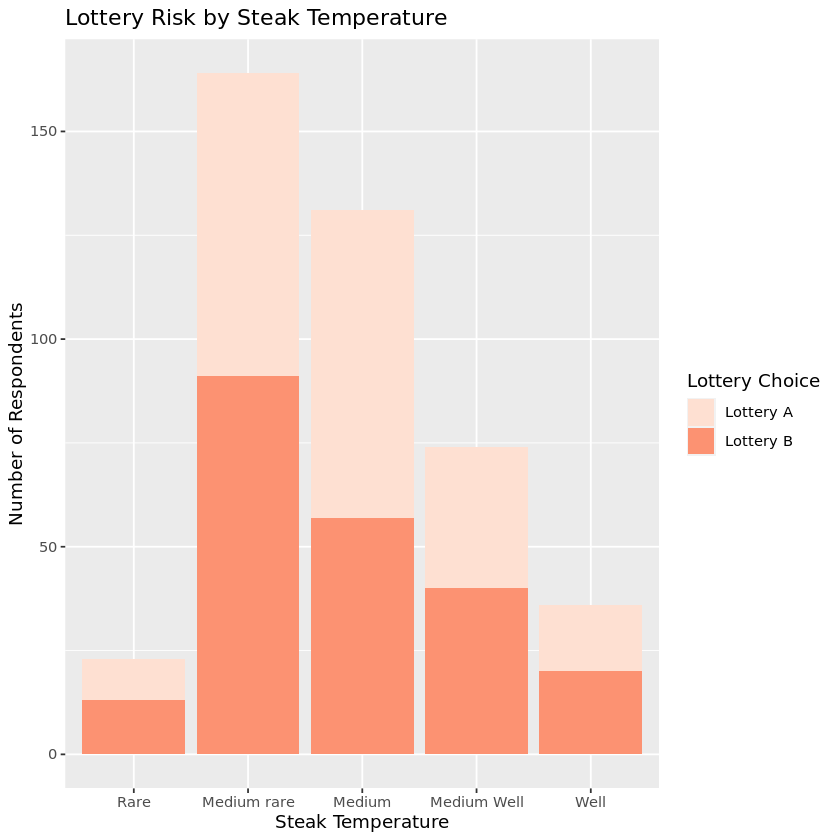

In [9]:
p1 = ggplot(steak_df3, aes(x=temp, fill=`lottery`)) + geom_bar() +
    labs(x="Steak Temperature", y="Number of Respondents", fill="Lottery Choice") +
    ggtitle("Lottery Risk by Steak Temperature") +
    scale_fill_brewer(palette = "Reds")

p1

Another way to determine the amount of risk with which the respondent is comfortable taking would be to inquire upon their skydiving experience. We could hypothesis that individuals who have some experience skydiving would enjoy their steaks on the rarer side.  

In [15]:
steak_df4 = steak_df3 |> filter(!is.na(`Have you ever been skydiving?`)) |> 
    group_by(`Have you ever been skydiving?`) |>
    count(temp)

steak_df4

Have you ever been skydiving?,temp,n
<chr>,<fct>,<int>
No,Rare,22
No,Medium rare,153
No,Medium,123
No,Medium Well,66
No,Well,34
Yes,Rare,1
Yes,Medium rare,10
Yes,Medium,8
Yes,Medium Well,7


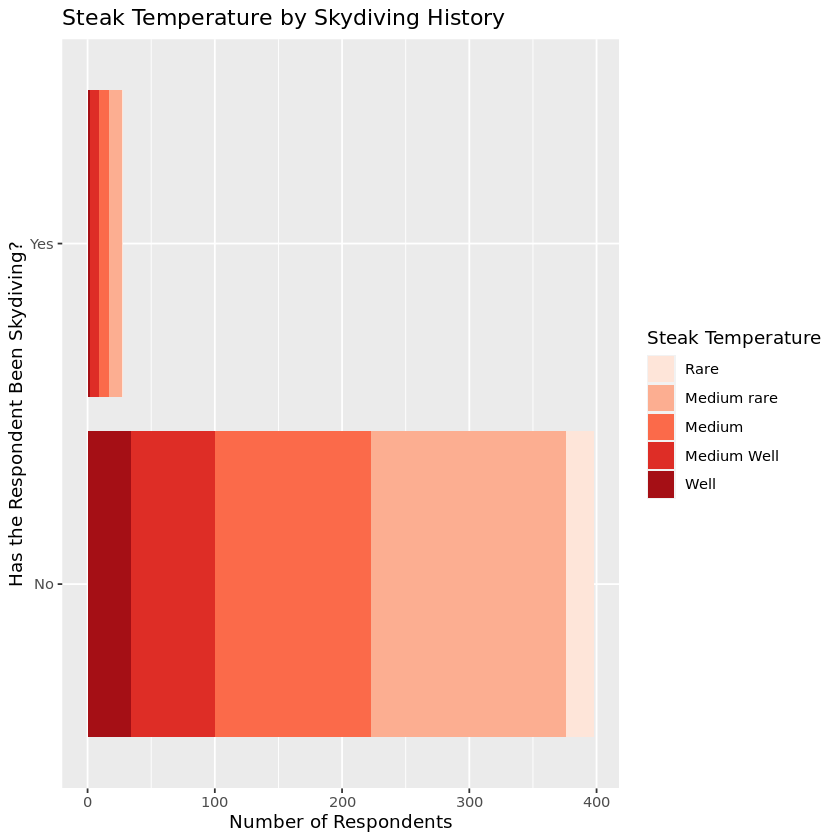

In [14]:
p2 = ggplot(steak_df4, aes(x=n, y=`Have you ever been skydiving?`, fill=`temp`)) + geom_bar(stat='identity') +
    labs(y="Has the Respondent Been Skydiving?", x="Number of Respondents", fill="Steak Temperature") +
    ggtitle("Steak Temperature by Skydiving History") +
    scale_fill_brewer(palette = "Reds")
p2

Lastly, we may ask respondents if they have ever cheated on their significant other to determine their level of comfortability in taking risk. 

In [17]:
steak_df5= steak_df3 |> filter(!is.na(`Have you ever cheated on your significant other?`)) |>
    group_by(`Have you ever cheated on your significant other?`) |>
    count(temp)

steak_df5

Have you ever cheated on your significant other?,temp,n
<chr>,<fct>,<int>
No,Rare,18
No,Medium rare,143
No,Medium,105
No,Medium Well,59
No,Well,29
Yes,Rare,5
Yes,Medium rare,20
Yes,Medium,26
Yes,Medium Well,14


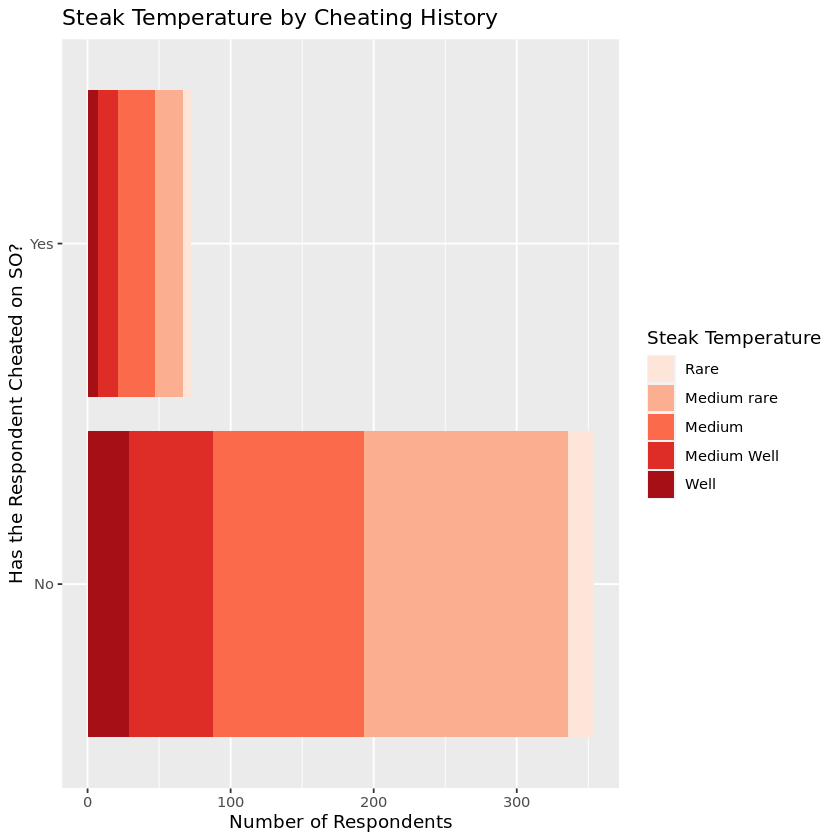

In [18]:
p3 = ggplot(steak_df5, aes(x=n, y=`Have you ever cheated on your significant other?`, fill=`temp`)) + geom_bar(stat='identity') +
    labs(y="Has the Respondent Cheated on SO?", x="Number of Respondents", fill="Steak Temperature") +
    ggtitle("Steak Temperature by Cheating History") +
    scale_fill_brewer(palette = "Reds")
p3